# Logistic Regression Formula
# $$h_\theta(x) = \sigma(\theta^T.X)$$

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

#sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression


# Data Preparation
    - sklearn make_blobs to create cluster datasets
    - 

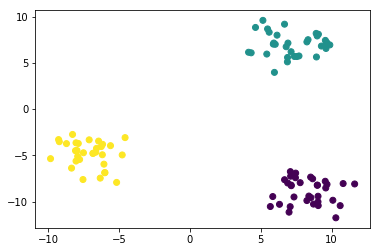

In [2]:
# Returns np array for X and y
num_of_features = 4
number_of_clusters = 3
standard_deviation = 1.5
X, y = make_blobs(n_samples=100,n_features=num_of_features, centers=number_of_clusters, cluster_std=standard_deviation)

df_dict  = dict()
# print(X)
for i in range(0, num_of_features):
#     print(X[..., i])
    Feature_Label = 'x'
    Feature_Label = Feature_Label + str(i)
    df_dict[Feature_Label] = X[..., i]


# df_dict
# Converting array into Dataframe
df = pd.DataFrame(dict(df_dict, label=y))
# df.head()

plt.scatter(x = df.x0, y=df.x1, c=y)

# [Regularization C value explained Expalined](https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/)

<class 'numpy.ndarray'> (112, 113)
<class 'numpy.ndarray'> (112, 113)


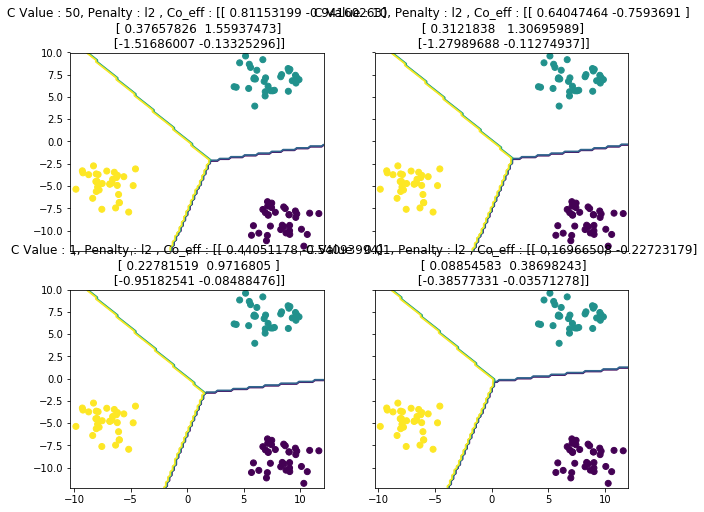

In [3]:
h=0.2
penalty = 'l2'
x_min, x_max = df['x0'].values.min()- .5, df['x0'].values.max() + .5
y_min, y_max = df['x1'].values.min() - .5, df['x1'].values.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

print(type(xx), xx.shape)
print(type(yy), yy.shape)


C_Values = [50, 10, 1, 0.01]
pos = product([0, 1], [0, 1])
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for c, position in zip(C_Values, pos):
    lr_clf = LogisticRegression(C=c, penalty=penalty)
    lr_clf.fit(df[['x0', 'x1']], df['label'])
    Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    i, j  = position
    axarr[i, j].contour(xx, yy, Z)
    axarr[i, j].scatter(df.x0, df.x1, c=y)
    axarr[i, j].set_title("C Value : {}, Penalty : {} , Co_eff : {}".format(c, penalty, lr_clf.coef_))
    

<class 'numpy.ndarray'> (112, 113)
<class 'numpy.ndarray'> (112, 113)


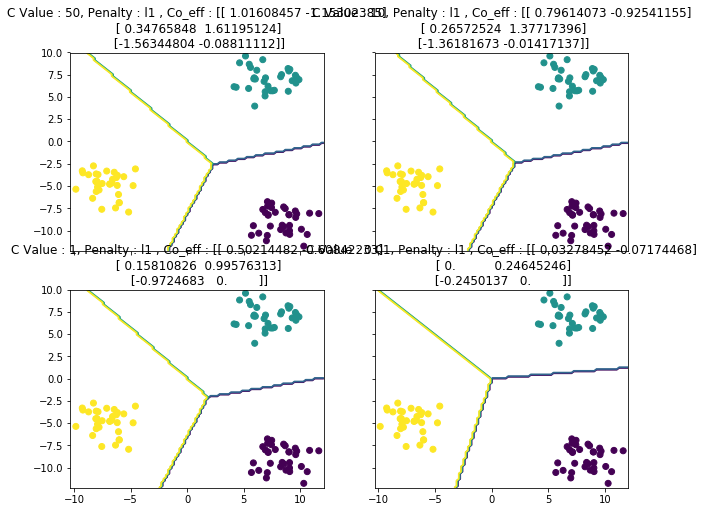

In [4]:
h=0.2
penalty = 'l1'
x_min, x_max = df['x0'].values.min()- .5, df['x0'].values.max() + .5
y_min, y_max = df['x1'].values.min() - .5, df['x1'].values.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

print(type(xx), xx.shape)
print(type(yy), yy.shape)


C_Values = [50, 10, 1, 0.01]
pos = product([0, 1], [0, 1])
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for c, position in zip(C_Values, pos):
    lr_clf = LogisticRegression(C=c, penalty=penalty)
    lr_clf.fit(df[['x0', 'x1']], df['label'])
    Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    i, j  = position
    axarr[i, j].contour(xx, yy, Z)
    axarr[i, j].scatter(df.x0, df.x1, c=y)
    axarr[i, j].set_title("C Value : {}, Penalty : {} , Co_eff : {}".format(c, penalty, lr_clf.coef_))
    